In [24]:
import pandas as pd # import pandas (to read and work with csv files)
import numpy as np # import numpy (to create arrays)
import os
import pickle
import matplotlib.pyplot as plt # import matplotlib.pyplot (to create plots)
from sklearn.linear_model import LogisticRegression
import seaborn as sns # import seaborn (to create plots)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler # import StandardScaler (to scale data)
from imblearn.under_sampling import TomekLinks # import TomekLinks (to undersample majority class)
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

### Primera inspección del set de datos
Vemos que no tiene nombres de columnas, las añadiremos por comodidad

In [2]:
data = pd.read_csv('../data/creditcardmarketing.csv') # read csv file and store in data
data.head()

,1,No,Air Miles,Letter,High,1.1,No.1,High.1,2,1.2,4,No.2,1160.75,1669,877,1095,1002
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [3]:
nomcolum = ['Customer number', 'Offer accepted','Reward', 'Mailer type', 'Income Level', 'Bank accounts opened', 'Overdraft protection', 'Credit Rating',
            'Credit cards held', 'Homes Owned', 'Household size', 'Owned home','Avg Balance', 'Avg balance Q1',
            'Avg balance Q2', 'Avg balance Q3', 'Avg balance Q4']
data = pd.read_csv('../data/creditcardmarketing.csv', names =nomcolum,index_col=False) 
data.head()

,Customer number,Offer accepted,Reward,Mailer type,Income Level,Bank accounts opened,Overdraft protection,Credit Rating,Credit cards held,Homes Owned,Household size,Owned home,Avg Balance,Avg balance Q1,Avg balance Q2,Avg balance Q3,Avg balance Q4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
data.describe()

,Customer number,Bank accounts opened,Credit cards held,Homes Owned,Household size,Avg Balance,Avg balance Q1,Avg balance Q2,Avg balance Q3,Avg balance Q4
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer number       18000 non-null  int64  
 1   Offer accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   Bank accounts opened  18000 non-null  int64  
 6   Overdraft protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   Credit cards held     18000 non-null  int64  
 9   Homes Owned           18000 non-null  int64  
 10  Household size        18000 non-null  int64  
 11  Owned home            18000 non-null  object 
 12  Avg Balance           17976 non-null  float64
 13  Avg balance Q1        17976 non-null  float64
 14  Avg balance Q2        17976 non-null  float64
 15  Avg balance Q3     

### Limpieza del dataset

- Eliminamos valores nulos y vacios
- Eliminamos datos redundantes
- Preparamos la codificacion one hot

In [6]:
data.isna().sum()

Customer number          0
Offer accepted           0
Reward                   0
Mailer type              0
Income Level             0
Bank accounts opened     0
Overdraft protection     0
Credit Rating            0
Credit cards held        0
Homes Owned              0
Household size           0
Owned home               0
Avg Balance             24
Avg balance Q1          24
Avg balance Q2          24
Avg balance Q3          24
Avg balance Q4          24
dtype: int64

In [7]:
data=data.dropna()
data.isna().sum()


Customer number         0
Offer accepted          0
Reward                  0
Mailer type             0
Income Level            0
Bank accounts opened    0
Overdraft protection    0
Credit Rating           0
Credit cards held       0
Homes Owned             0
Household size          0
Owned home              0
Avg Balance             0
Avg balance Q1          0
Avg balance Q2          0
Avg balance Q3          0
Avg balance Q4          0
dtype: int64

Ahora codificamos las caracteristicas en tipos digeribles por el algoritmo. Comprobamos que no tenemos categorias que no esten mapeadas a un numero. Podemos utilizar dummies o mapear categorias a valores numericos. Con dummies que es la tecnica one hot, creamos columnas nuevas, y esto puede ser negativo si no sabemos muy bien lo que estamos haciendo. Por ejemplo puede parecer que aumenta la significancia del valor de una columna si esa categoria es muy concreta. Por ejemplo si hacemos one hot de nombres de personas que entran a un edificio y lo correlamos con las personas que estan dentro cuando hay un incendio, siempre va a estar paco o joseluis y los pobres no tienen la culpa.

In [8]:
data['Offer accepted'] = data['Offer accepted'].map({'Yes':1, 'No':0})
data['Overdraft protection'] = data['Overdraft protection'].map({'Yes':1, 'No':0})
data['Owned home'] = data['Owned home'].map({'Yes':1, 'No':0})
data['Reward'] = data['Reward'].map({'Air Miles':1, 'Cash Back':2,'Points':3}) 
data['Mailer type'] = data['Mailer type'].map({'Letter':1, 'Postcard':2})
data['Income Level'] = data['Income Level'].map({'Low':1, 'Medium':2, 'High':3})
data['Credit Rating'] = data['Credit Rating'].map({'Low':1, 'Medium':2, 'High':3})

Comprobamos por primera vez que nuestras variables son todas muy independientes a ver si es cierto.

<AxesSubplot:>

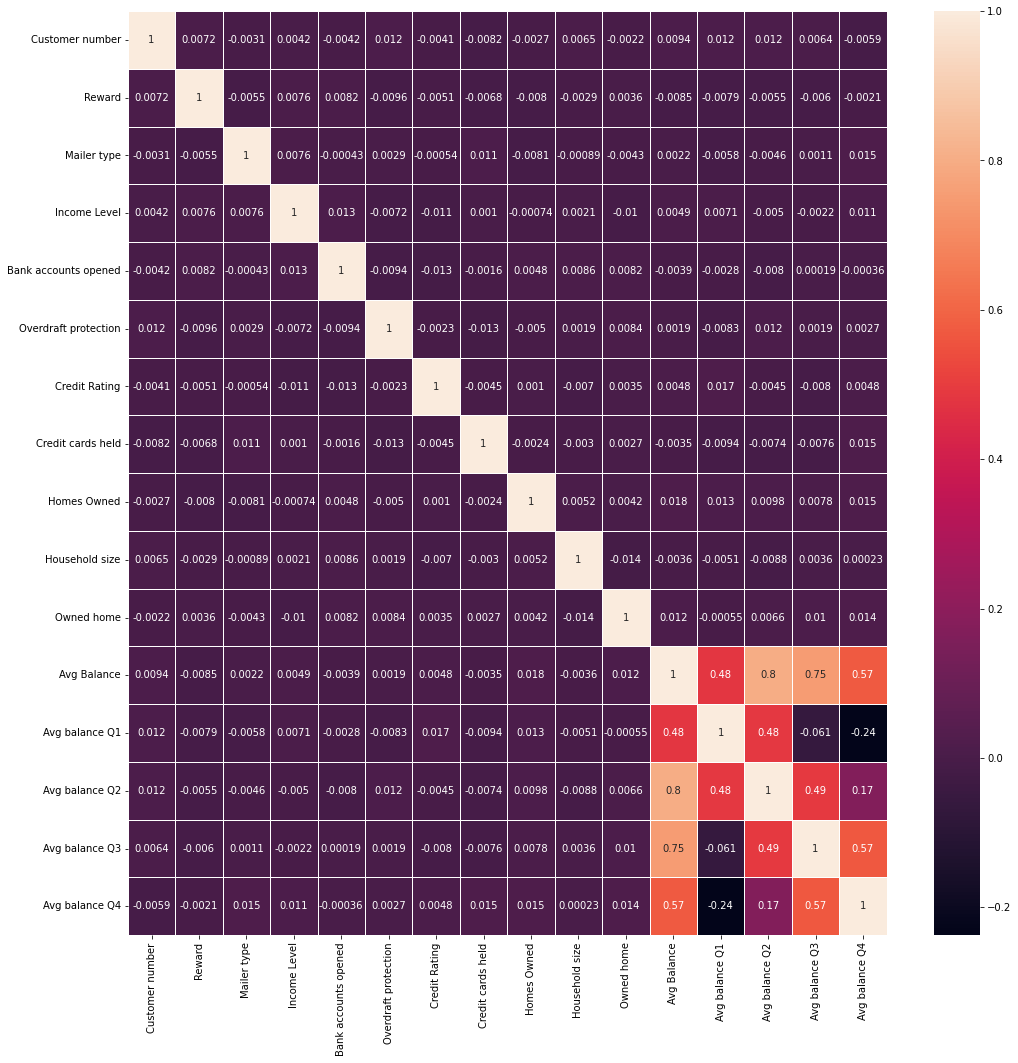

In [9]:
fig, ax = plt.subplots(figsize=(data.shape[1],data.shape[1]))
sns.heatmap(data.drop(columns=["Offer accepted"]).corr(), annot=True, linewidths=.5, ax=ax)

Las variables de balances parciales no son nada independientes como cabria esperar, asique algo hay que hacer con ellas. Podriamos crear una caracteristica nueva con los cambios durante el año por ejemplo y eliminar los balances parciales.

In [10]:
auxdf = data[['Avg balance Q1' , 'Avg balance Q2', 'Avg balance Q3', 'Avg balance Q4']]
print(auxdf.max(axis=1)/ auxdf.sum(axis=1) - auxdf.min(axis=1) / auxdf.sum(axis=1))
#data['Balance variability'] = (auxdf.max(axis=1)/ auxdf.sum(axis=1)) - (auxdf.min(axis=1) / auxdf.sum(axis=1))
data['Balance variability 2'] = abs((auxdf.std(axis=1) - auxdf.min(axis=1)) / (auxdf.max(axis=1) - auxdf.min(axis=1) / auxdf.sum(axis=1)))

0        0.170579
1        0.555178
2        0.200723
3        0.275021
4        0.366433
           ...   
17995    0.497015
17996    0.131981
17997    0.167165
17998    0.241868
17999    0.405540
Length: 17976, dtype: float64


In [11]:
data = data.drop(columns=['Avg balance Q1', 'Avg balance Q2', 'Avg balance Q3', 'Avg balance Q4'])


In [12]:
data.head()

,Customer number,Offer accepted,Reward,Mailer type,Income Level,Bank accounts opened,Overdraft protection,Credit Rating,Credit cards held,Homes Owned,Household size,Owned home,Avg Balance,Balance variability 2
0,1,0,1,1,3,1,0,3,2,1,4,0,1160.75,0.315549
1,2,0,1,1,2,1,0,2,2,2,5,1,147.25,0.298958
2,3,0,1,2,3,2,0,2,2,1,2,1,276.50,0.112084
3,4,0,1,1,2,2,0,3,1,1,4,0,1219.00,0.101511
4,5,0,1,1,2,1,0,2,2,1,6,1,1211.00,0.176261


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer number        17976 non-null  int64  
 1   Offer accepted         17976 non-null  int64  
 2   Reward                 17976 non-null  int64  
 3   Mailer type            17976 non-null  int64  
 4   Income Level           17976 non-null  int64  
 5   Bank accounts opened   17976 non-null  int64  
 6   Overdraft protection   17976 non-null  int64  
 7   Credit Rating          17976 non-null  int64  
 8   Credit cards held      17976 non-null  int64  
 9   Homes Owned            17976 non-null  int64  
 10  Household size         17976 non-null  int64  
 11  Owned home             17976 non-null  int64  
 12  Avg Balance            17976 non-null  float64
 13  Balance variability 2  17976 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 2.1 MB


<AxesSubplot:>

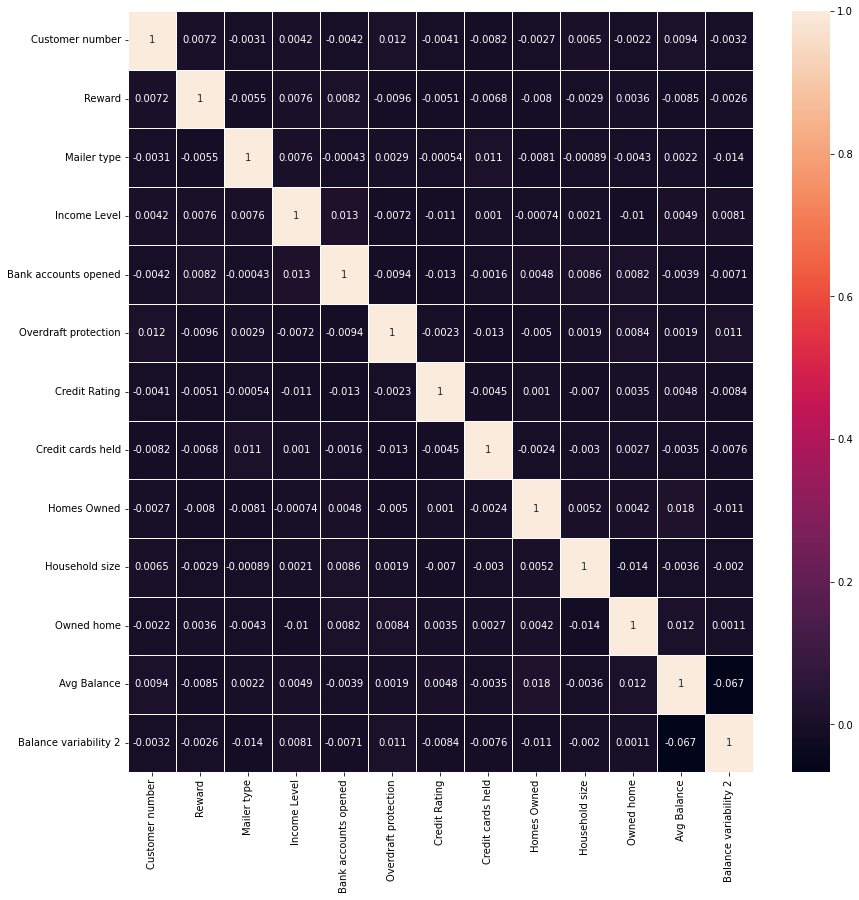

In [14]:
fig, ax = plt.subplots(figsize=(data.shape[1],data.shape[1]))
#sns.heatmap(data.drop(columns=["Offer accepted"]).corr(), annot=True, linewidths=.5, ax=ax)

# Plot data correlation
sns.heatmap(data.drop(columns=["Offer accepted"]).corr(), annot=True, linewidths=.5, ax=ax)

In [16]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Credit card acceptance", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Vemos que la nueva variable no correla con nada, eso es que lo he hecho muy bien o muy mal. Puede que no sirva para nada pero por lo menos no va a interferir con otras variables.

### Preparacion de los datos para el entrenamiento

- Comprobar la cantidad de datos para cada valor posible de la variable independiente
- Partir los datos
- Balancear los datos
- Normalizar los datos

0    16955
1     1021
Name: Offer accepted, dtype: int64


c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


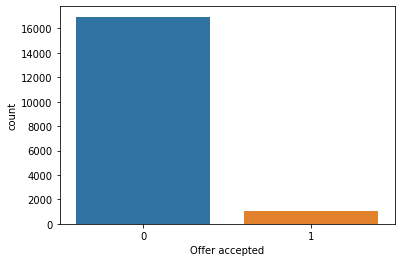

In [15]:
print(data['Offer accepted'].value_counts())
sns.countplot(data['Offer accepted']);

Pues menudo problemón, esto tiene un desbalanceo del copón. Esto era de esperar ya que si se quiere predecir que la oferta se acepta es porque la acepta muy poca gente. Podemos generar datos sintéticos o bien coger al azar valores descartando hasta tener 1000 de cada.
Evidentemente no nos vamos a inventar un orden de magnitud de datos. Podriamos generar 2x y descartar 15000 en vez de 16000 por ejemplo. Vamos a probar simplemente descartando de los que dicen que no y posteriormente retomamos la otra alternativa si obtenemos malos resultados.

Lo primero antes de hacer nada para evitar leaks es trocear en datos de entrenamiento y test. De hecho lo óptimo es guardar una pequeñisima parte para validar al final y no utilizar nunca esos datos, solamente cuando estemos a punto de aceptar nuestro modelo. Cualquier decision que tomemos de una forma u otra al final se va a filtrar.

In [16]:
X =data.drop(columns = ["Offer accepted"])
y = data["Offer accepted"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(y)


0        0
1        0
2        0
3        0
4        0
        ..
17995    0
17996    0
17997    0
17998    0
17999    0
Name: Offer accepted, Length: 17976, dtype: int64


In [17]:
def create_scaler(train_set,name = 'scaler.pkl'):

    if ( os.path.isdir('../scalers/scaler.pkl') ):
        scaler = pickle.load(open('../scalers/' + name, 'rb'))
    else:
        if ( os.path.isdir('../scalers/') == False ):
            os.makedirs('../scalers/')
        scaler = PowerTransformer()
        scaler.fit(train_set)
        pickle.dump(scaler, open('../scalers/' + name, 'wb'))
        
    return scaler

In [18]:
scaler = create_scaler(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)



### Elección de la estrategia de clasificación

Vamos a utilizar la documentación existente para elegir una estrategia. Después ya decidiremos cual funciona mejor.


<img src="https://scikit-learn.org/stable/_static/ml_map.png" alt="Scikit cheat sheet"/>

Según la guía de scikit, deberiamos obtener los mejores resultados con SVM utilizando un kernel lineal. Si no nos funcionase, podemos probar SVM con otros kernel o los ensemble classifiers que son técnicas utilizando varios clasificadores sinergeticamente como en una startup de alto crecimiento orgánico. Sin embargo antes y ya que es tan fácil crear clasificadores y probarlos, vamos a ver el efecto que tiene el desbalanceo, vamos a probar los clasificadores sugeridos en el curso y el que esta descrito en el paquete imbalance de scikit.

Metiendo todo en una coctelera y agitando fuerte confeccionamos un plan de acción tipo escaleta.

### Parte 1, utilizamos datos sin balancear manualmente

1) Clasificador RandomForest de scikit y BalancedRandomForest, comparación para ver el efecto del desbalanceo
2) Clasificador SVM lineal utilizando la opcion de pesos en las clases
3) Clasificador KNeighbors
4) Clasificador SVM con diferentes kernel usando la opcion de los pesos en las clases
5) Clasificadores ensemble

### Parte 2, balanceamos los datos

1) Técnica de balanceo con SMOTE y Tomeklinks
2) Técnica de balanceo por undersampling puro y duro
3) Prueba de RandomForest con datos balanceados manualmente
4) Prueba de KNeighbors
5) Prueba de SVM con datos balanceados manualmente

### Parte 3, escogemos el modelo que mejor nos funciona

1) Eleccion del modelo
2) Analisis del modelo

### Clasificación sin balancear

Para SVM y para KNeighbors es muy importante que los datos esten normalizados, para random forest en principio no hace falta. Normalizar significa que estan todos dentro de un rango dado, por ejemplo el intervalo cerrado [0 1], de esta forma no se asigna mayor importancia a una caracteristica de manera artificial solo porque su magnitud absoluta sea mayor. Una explicación muy simplista sería que de esta forma podemos utilizar indistintamente diferentes medidas sin tener en cuenta las unidades. 

Por simplicidad utilizaremos los datos normalizados con el scaler utilizado previamente en todos los clasificadores de este apartado.

#### RandomForest y BalancedRandomForest

Utilizamos el ejemplo de la documentacion de scikit del tirón

Random Forest classifier performance:
Balanced accuracy: 0.50 - Geometric mean 0.00
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.00      0.00      0.00       314

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.48      5393
weighted avg       0.89      0.94      0.91      5393

Balanced Random Forest classifier performance:
Balanced accuracy: 0.69 - Geometric mean 0.69
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      5079
           1       0.11      0.73      0.20       314

    accuracy                           0.65      5393
   macro avg       0.54      0.69      0.49      5393
weighted avg       0.92      0.65      0.75      5393



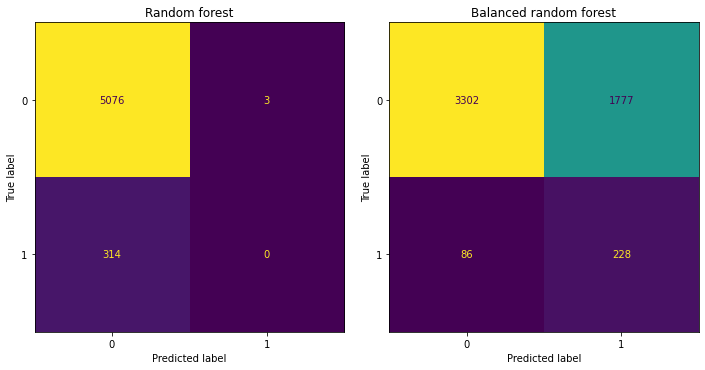

In [25]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

rf = RandomForestClassifier(n_estimators=100, random_state=0)
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train_norm, y_train)
brf.fit(X_train_norm, y_train)

y_pred_rf = rf.predict(X_test_norm)
y_pred_brf = brf.predict(X_test_norm)

print("Random Forest classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_rf):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_rf):.2f}"
)
y_pred = rf.predict(X_test_norm)
cr = classification_report(y_test.values, y_pred)
print(cr)

print("Balanced Random Forest classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_brf):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_brf):.2f}"
)

y_pred = brf.predict(X_test_norm)
cr = classification_report(y_test.values, y_pred)
print(cr)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(rf, X_test_norm, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("Random forest")

ConfusionMatrixDisplay.from_estimator(brf, X_test_norm, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("Balanced random forest")

fig.tight_layout()


Vemos que sin balancear los datos, la categoria que tiene muchos mas datos acaba teniendo mucha mas importancia y nuestro modelo no da una. Tirando una moneda al aire acertariamos mas veces, y desde luego lo hariamos mucho peor que un operador telefónico experimentado que se huele a las vi clientes.

El recall de la categoria 1 (oferta aceptada) es muy malo, y la f1-score que depende de ello en parte, puesta también es horrorosa. Y eso en el balanced, en el que esta sin balancear no da una.

#### Linear SVC

Utilizamos el ejemplo de scikit directamente

In [190]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


clf = LinearSVC(random_state=0, class_weight='balanced')
clf.fit(X_train_norm, y_train)

score = clf.score(X_train_norm, y_train)
print("Score: ", score)

y_pred = clf.predict(X_test_norm)
cr = classification_report(y_test, y_pred)

print(cr)


Score:  0.6580306763093062
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      5079
           1       0.12      0.72      0.20       314

    accuracy                           0.66      5393
   macro avg       0.55      0.69      0.49      5393
weighted avg       0.92      0.66      0.75      5393



c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Como podemos ver la precision y el recall son malos para la categoria que esta en minoria. Nuevamente resaltamos la importancia de los datos balanceados, si quitamos el parametro class_weight='balanced' y probamos, la funcion classification_report va a dar error al no clasificar nada como 0



Score:  0.9438130811412223
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.00      0.00      0.00       314

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.49      5393
weighted avg       0.89      0.94      0.91      5393



c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

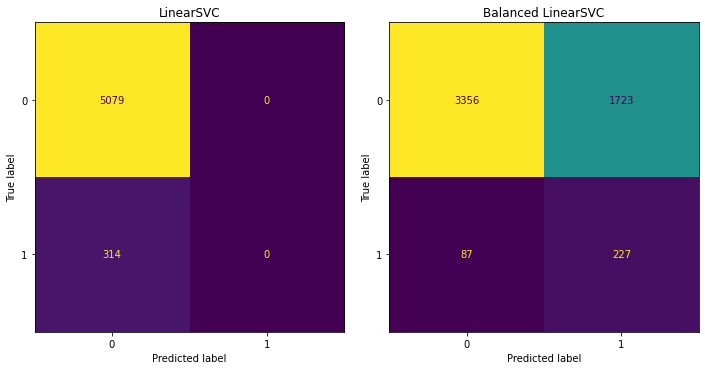

In [193]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


clf2 = LinearSVC(random_state=0)
clf2.fit(X_train_norm, y_train)

score = clf2.score(X_train_norm, y_train)
print("Score: ", score)

y_pred = clf2.predict(X_test_norm)
cr = classification_report(y_test, y_pred)

print(cr)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(clf2, X_test_norm, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("LinearSVC")

ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("Balanced LinearSVC")

fig.tight_layout()


#### KNeighbors

Seguimos con el guión. Al parecer LinearSVC no llega a converger, hay un warning, por lo que siguiendo el itinerario de la guía de sklearn probamos KNeighbors. Ya tenemos los datos normalizados no habrá problema por esto. En este caso, vamos a obtener un resultado inutil ya que la implementacion de KNeighborsClassifier de scikit no incluye un parametro para modificar el peso de las clases. Tendremos que revisitar este modelo posteriormente.

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.15      0.01      0.02       314

    accuracy                           0.94      5393
   macro avg       0.55      0.50      0.50      5393
weighted avg       0.90      0.94      0.91      5393



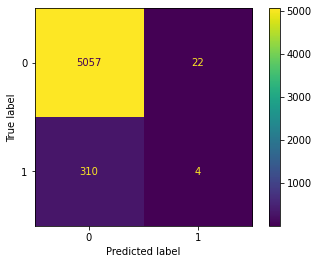

In [216]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_norm, y_train)
y_pred = neigh.predict(X_test_norm)
cr = classification_report(y_test, y_pred)

print(cr)


ConfusionMatrixDisplay.from_estimator(neigh, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()


#### SVC 

Probamos ahora SVC con diferentes kernels. Como antes cogemos los ejemplos de la documentacion sin más y damos las gracias a la gente que ha escrito todo esto. https://scikit-learn.org/stable/about.html#citing-scikit-learn

Performance of SVC with linear kernel
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.15      0.01      0.02       314

    accuracy                           0.94      5393
   macro avg       0.55      0.50      0.50      5393
weighted avg       0.90      0.94      0.91      5393

Performance of LinearSVC (linear kernel)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.15      0.01      0.02       314

    accuracy                           0.94      5393
   macro avg       0.55      0.50      0.50      5393
weighted avg       0.90      0.94      0.91      5393

Performance of SVC with RBF kernel
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.15      0.01      0.02       314

    accuracy                           0.94      5393
   macro avg  

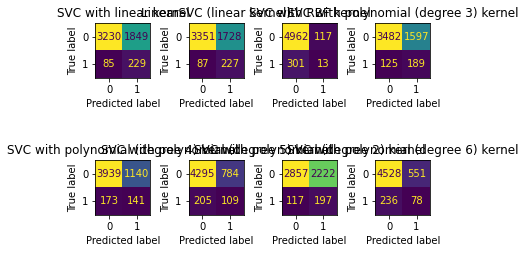

<Figure size 7200x3600 with 0 Axes>

In [229]:
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C,class_weight='balanced'),
    svm.LinearSVC(C=C, max_iter=10000,class_weight='balanced'),
    svm.SVC(kernel="rbf", gamma=0.7, C=C,class_weight='balanced'),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C,class_weight='balanced'),
    svm.SVC(kernel="poly", degree=4, gamma="auto", C=C,class_weight='balanced'),
    svm.SVC(kernel="poly", degree=5, gamma="auto", C=C,class_weight='balanced'),
    svm.SVC(kernel="poly", degree=2, gamma="auto", C=C,class_weight='balanced'),
    svm.SVC(kernel="poly", degree=6, gamma="auto", C=C,class_weight='balanced'),
)
models = (clf.fit(X_train_norm, y_train) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
    "SVC with polynomial (degree 4) kernel",
    "SVC with polynomial (degree 5) kernel",
    "SVC with polynomial (degree 2) kernel",
    "SVC with polynomial (degree 6) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.figure(figsize=(100, 50))


for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test,ax=ax, colorbar=False)
    ax.set_title(title)

    y_pred = neigh.predict(X_test_norm)
    cr = classification_report(y_test, y_pred)
    print ("Performance of " + title)
    print(cr)

plt.show()

#### Ensembles

Ahora probamos los clasificadores compuestos que nos ofrece scikit a ver que tal

0.672332873089266
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      5079
           1       0.12      0.65      0.20       314

    accuracy                           0.70      5393
   macro avg       0.54      0.67      0.50      5393
weighted avg       0.92      0.70      0.78      5393



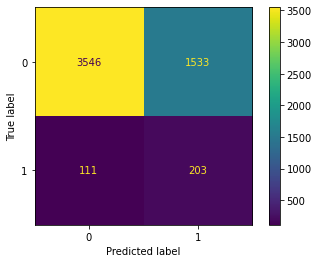

In [242]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0,class_weight='balanced')
brf.fit(X_train_norm, y_train) 

y_pred = brf.predict(X_test_norm)
print(balanced_accuracy_score(y_test, y_pred) )
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(brf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()


0.6720547828387904
              precision    recall  f1-score   support

           0       0.97      0.69      0.81      5079
           1       0.12      0.65      0.20       314

    accuracy                           0.69      5393
   macro avg       0.54      0.67      0.50      5393
weighted avg       0.92      0.69      0.77      5393



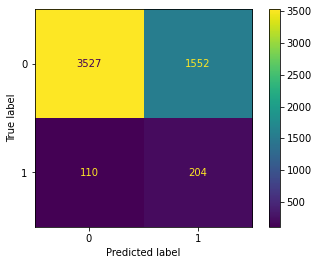

In [244]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
rusboost.fit(X_train_norm, y_train)  

y_pred = rusboost.predict(X_test_norm)
print(balanced_accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(rusboost, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      5079
           1       0.12      0.44      0.19       314

    accuracy                           0.78      5393
   macro avg       0.54      0.62      0.53      5393
weighted avg       0.91      0.78      0.83      5393



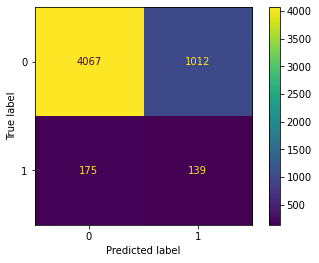

In [241]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train_norm, y_train) 

y_pred = bbc.predict(X_test_norm)
balanced_accuracy_score(y_test, y_pred) 
cr = classification_report(y_test.values, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(bbc, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()



### Balanceo de datos manual

Vamos ahora a probar balancear. Usaremos dos opciones la tecnica SMOTE + TomekLinks y recortar muestras (undersample) sin más.

SMOTE nos genera datos sintéticos que van a ser muy ruidosos o directamente van a ser mentira, asi que se descartan muestras tras la generación si estan muy cerca los datos generados de los de la clase contraria. 

Si todo va bien, el recall debería ser mejor (mas cercano a 1). Recordar que recall se define como $\frac{positivos correctos }{(positivos correctos + falsos negativos)}$  

Es importante no hacer un resample en los datos de test, ya que en el mundo real los datos no van a cambiar por mucho que queramos, incluso teniendo mucho dinero.

In [347]:
from imblearn.combine import SMOTETomek 
from collections import Counter
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train_norm, y_train)
X_res2, y_res2 = smt.fit_resample(X_train_norm2, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 11870, 1: 11870})


Ahora que tenemos 11870 de cada, vamos a probar que tal funcionan los algoritmos.

Score:  0.7311869666408068
              precision    recall  f1-score   support

           0       0.98      0.64      0.77      5079
           1       0.11      0.75      0.20       314

    accuracy                           0.64      5393
   macro avg       0.55      0.69      0.48      5393
weighted avg       0.93      0.64      0.74      5393



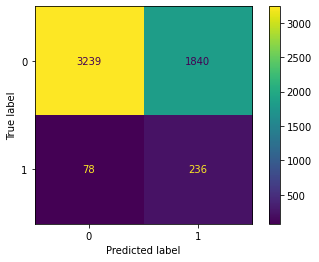

In [252]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


clf = LinearSVC(random_state=0, class_weight='balanced')
clf.fit(X_res, y_res)

score = clf.score(X_res, y_res)
print("Score: ", score)

y_pred = clf.predict(X_test_norm)
cr = classification_report(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()
print(cr)

Menuda decepción, nos quedamos igual que estabamos, el recall no ha mejorado. Vamos a probar con SMOTE + ENN a ver.

In [432]:
from imblearn.combine import SMOTEENN 


sme = SMOTEENN(random_state=42)
X_res2, y_res2 = sme.fit_resample(X_train_norm, y_train)
print('Resampled dataset shape %s' % Counter(y_res2))

Resampled dataset shape Counter({1: 11736, 0: 8888})


Score:  0.7383145849495734
              precision    recall  f1-score   support

           0       0.98      0.56      0.72      5079
           1       0.10      0.81      0.18       314

    accuracy                           0.58      5393
   macro avg       0.54      0.68      0.45      5393
weighted avg       0.93      0.58      0.68      5393



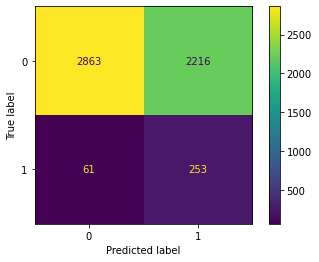

In [437]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


clf = LinearSVC(random_state=0, C=0.1)
clf.fit(X_res2, y_res2)

score = clf.score(X_res2, y_res2)
print("Score: ", score)

y_pred = clf.predict(X_test_norm)
cr = classification_report(y_test, y_pred)

print(cr)

ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()

Parece que este metodo funciona algo mejor con la categoria de aceptada, pero el modelo predice muy mal la categoria no aceptada, tiene muchos falsos negativos. Vamos a probar con mas clasificadores.

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5079
           1       0.09      0.14      0.11       314

    accuracy                           0.87      5393
   macro avg       0.52      0.53      0.52      5393
weighted avg       0.90      0.87      0.88      5393

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      5079
           1       0.10      0.32      0.15       314

    accuracy                           0.80      5393
   macro avg       0.53      0.57      0.52      5393
weighted avg       0.90      0.80      0.84      5393



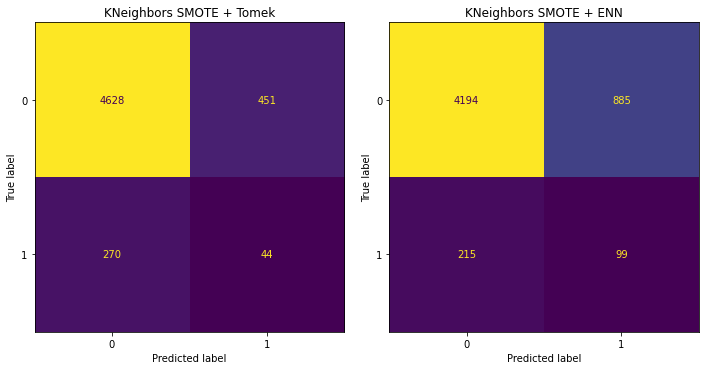

In [438]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_res, y_res)
y_pred = neigh.predict(X_test_norm)
cr = classification_report(y_test, y_pred)

print(cr)


neigh2 = KNeighborsClassifier(n_neighbors=2)
neigh2.fit(X_res2, y_res2)
y_pred = neigh2.predict(X_test_norm)
cr = classification_report(y_test, y_pred)

print(cr)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(neigh, X_test_norm, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("KNeighbors SMOTE + Tomek")

ConfusionMatrixDisplay.from_estimator(neigh2, X_test_norm, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("KNeighbors SMOTE + ENN")

fig.tight_layout()

Utilizamos GridSearch a ver si podemos optimizar un poco los hiperparametros, obtenemos que lo mejor es p =2. n_neighbors 2 y leaf_size 1

In [323]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10,n_jobs=20)
#Fit the model
best_model = clf.fit(X_res,y_res)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 2


              precision    recall  f1-score   support

           0       0.95      0.83      0.88      5079
           1       0.10      0.32      0.15       314

    accuracy                           0.80      5393
   macro avg       0.53      0.57      0.52      5393
weighted avg       0.90      0.80      0.84      5393



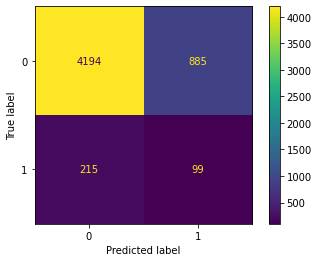

In [324]:
y_pred = clf.predict(X_test_norm)
cr = classification_report(y_test, y_pred)

print(cr)

ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()

Performance of SVC with linear kernel
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      5079
           1       0.10      0.82      0.18       314

    accuracy                           0.57      5393
   macro avg       0.54      0.69      0.45      5393
weighted avg       0.93      0.57      0.68      5393

Performance of LinearSVC (linear kernel)
              precision    recall  f1-score   support

           0       0.98      0.56      0.72      5079
           1       0.10      0.81      0.18       314

    accuracy                           0.58      5393
   macro avg       0.54      0.68      0.45      5393
weighted avg       0.93      0.58      0.68      5393

Performance of SVC with RBF kernel
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5079
           1       0.09      0.10      0.09       314

    accuracy                           0.89      5393
   macro avg  

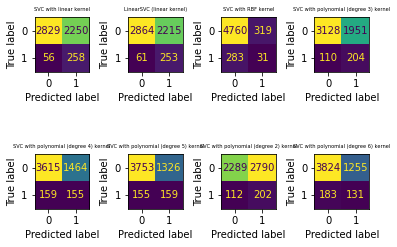

<Figure size 7200x3600 with 0 Axes>

In [304]:
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto"),
    svm.SVC(kernel="poly", degree=4, gamma="auto"),
    svm.SVC(kernel="poly", degree=5, gamma="auto"),
    svm.SVC(kernel="poly", degree=2, gamma="auto"),
    svm.SVC(kernel="poly", degree=6, gamma="auto"),
)
models = (clf.fit(X_res, y_res) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
    "SVC with polynomial (degree 4) kernel",
    "SVC with polynomial (degree 5) kernel",
    "SVC with polynomial (degree 2) kernel",
    "SVC with polynomial (degree 6) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.figure(figsize=(100, 50))


for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test,ax=ax, colorbar=False)
    ax.set_title(title,fontsize=5)

    y_pred = clf.predict(X_test_norm)
    cr = classification_report(y_test, y_pred)
    print ("Performance of " + title)
    print(cr)

plt.show()

Performance of SVC with linear kernel
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      5079
           1       0.10      0.82      0.18       314

    accuracy                           0.57      5393
   macro avg       0.54      0.69      0.45      5393
weighted avg       0.93      0.57      0.68      5393



c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Performance of LinearSVC (linear kernel)
              precision    recall  f1-score   support

           0       0.98      0.57      0.72      5079
           1       0.10      0.81      0.18       314

    accuracy                           0.58      5393
   macro avg       0.54      0.69      0.45      5393
weighted avg       0.93      0.58      0.69      5393

Performance of SVC with RBF kernel
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5079
           1       0.09      0.10      0.10       314

    accuracy                           0.89      5393
   macro avg       0.52      0.52      0.52      5393
weighted avg       0.89      0.89      0.89      5393

Performance of SVC with polynomial (degree 3) kernel
              precision    recall  f1-score   support

           0       0.96      0.63      0.76      5079
           1       0.09      0.63      0.16       314

    accuracy                           0.63      5393

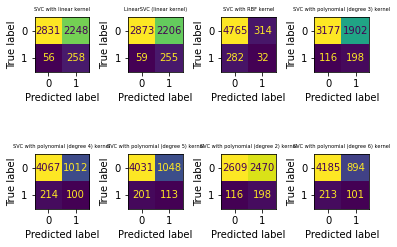

<Figure size 7200x3600 with 0 Axes>

In [315]:
C = 100  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
    svm.SVC(kernel="poly", degree=4, gamma="auto", C=C),
    svm.SVC(kernel="poly", degree=5, gamma="auto", C=C),
    svm.SVC(kernel="poly", degree=2, gamma="auto", C=C),
    svm.SVC(kernel="poly", degree=6, gamma="auto", C=C),
)
models = (clf.fit(X_res2, y_res2) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
    "SVC with polynomial (degree 4) kernel",
    "SVC with polynomial (degree 5) kernel",
    "SVC with polynomial (degree 2) kernel",
    "SVC with polynomial (degree 6) kernel",
)


fig, sub = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.figure(figsize=(100, 50))


for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test,ax=ax, colorbar=False)
    ax.set_title(title,fontsize=5)

    y_pred = clf.predict(X_test_norm)
    cr = classification_report(y_test, y_pred)
    print ("Performance of " + title)
    print(cr)

plt.show()

0.5522847293024983
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5079
           1       0.14      0.17      0.15       314

    accuracy                           0.89      5393
   macro avg       0.55      0.55      0.55      5393
weighted avg       0.90      0.89      0.90      5393



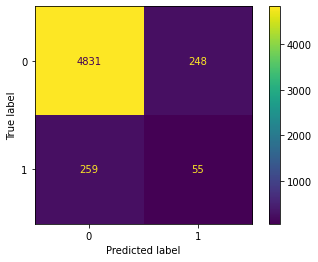

In [275]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_norm)
print(balanced_accuracy_score(y_test, y_pred) )
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(brf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()


0.6464535498361557
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      5079
           1       0.13      0.50      0.21       314

    accuracy                           0.77      5393
   macro avg       0.55      0.65      0.54      5393
weighted avg       0.91      0.77      0.83      5393



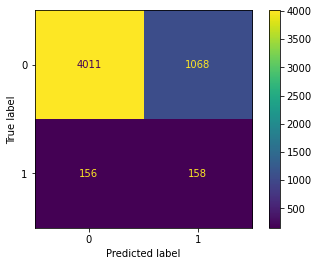

In [327]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=2)
clf4 = svm.SVC(probability=True)
clf5 = GaussianNB()



eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('KN', clf3),('SVC Linear', clf4),('NB', clf5)],
    voting='soft')

clf1 = clf1.fit(X_res,y_res)
clf2 = clf2.fit(X_res,y_res)
clf3 = clf3.fit(X_res,y_res)
clf4 = clf4.fit(X_res,y_res)
clf5 = clf5.fit(X_res,y_res)
eclf = eclf.fit(X_res,y_res)

y_pred = eclf.predict(X_test_norm)
print(balanced_accuracy_score(y_test, y_pred) )
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(eclf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()

#params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [2,5,10,15]}

#grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
#grid = grid.fit(X_res, y_res)

Por ultimo probamos un Voting Classifier utilizando los datos sin la variable que me he inventado a ver si mejora algo, pero tiene pinta que vamos a tener que probar el undersampling a mano sin crear datos sintéticos.

0.6020149159208079
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5079
           1       0.13      0.35      0.19       314

    accuracy                           0.82      5393
   macro avg       0.54      0.60      0.55      5393
weighted avg       0.91      0.82      0.86      5393



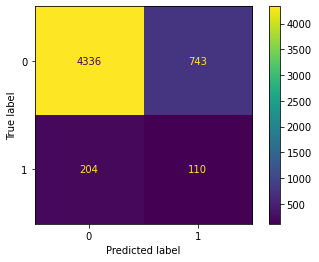

In [351]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


clf3 = KNeighborsClassifier(n_neighbors=10)
clf4 = svm.SVC(kernel='linear',probability=True)




eclf = VotingClassifier(
    estimators=[('KN', clf3),('SVC Linear', clf4)],
    voting='hard')


clf3 = clf3.fit(X_res2,y_res2)
clf4 = clf4.fit(X_res2,y_res2)

eclf = eclf.fit(X_res2,y_res2)

y_pred = eclf.predict(X_test_norm2)
print(balanced_accuracy_score(y_test, y_pred) )
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(eclf, X_test_norm2, y_test, ax=axs[0], colorbar=False).plot()


Vamos a probar varias ténicas a mano de undersampling, pero lo más prometedor va a ser utilizar los clasificadores que hemos probado al principio que ya tienen parametros para balanceo de datos.

In [357]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=3)
X_resampled_nm1, y_resampled = nm1.fit_resample(X_train_norm, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 707), (1, 707)]


0.5616488776691334
              precision    recall  f1-score   support

           0       0.95      0.54      0.69      5079
           1       0.07      0.59      0.13       314

    accuracy                           0.54      5393
   macro avg       0.51      0.56      0.41      5393
weighted avg       0.90      0.54      0.66      5393



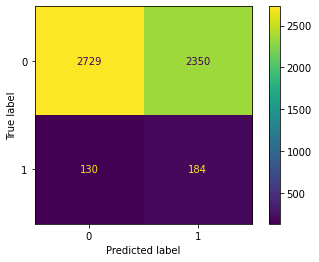

In [384]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_resampled_nm1, y_resampled)

y_pred = clf.predict(X_test_norm)
print(balanced_accuracy_score(y_test, y_pred) )
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()


[(0, 707), (1, 707)]
0.6733151242220057
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      5079
           1       0.11      0.70      0.19       314

    accuracy                           0.65      5393
   macro avg       0.54      0.67      0.48      5393
weighted avg       0.92      0.65      0.74      5393



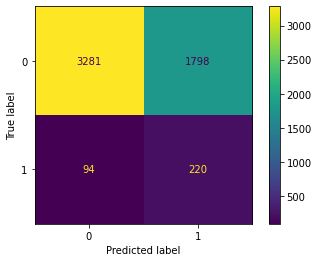

In [456]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train_norm, y_train)
print(sorted(Counter(y_resampled).items()))

clf = RandomForestClassifier()
clf = clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test_norm)
print(balanced_accuracy_score(y_test, y_pred) )
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(clf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()


0.6898832836094171
              precision    recall  f1-score   support

           0       0.97      0.69      0.81      5079
           1       0.12      0.69      0.21       314

    accuracy                           0.69      5393
   macro avg       0.55      0.69      0.51      5393
weighted avg       0.92      0.69      0.77      5393



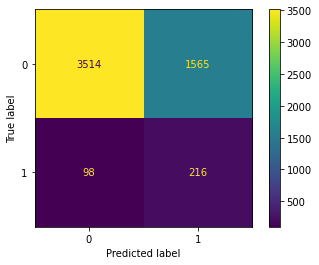

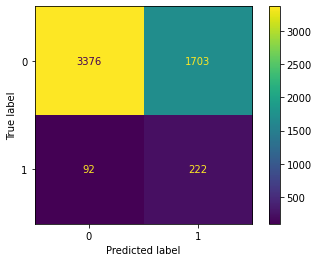

In [428]:
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import EasyEnsembleClassifier 



clf1 = svm.SVC(C=0.1, class_weight='balanced', gamma=1, kernel='linear', probability=True)
clf2 = BalancedRandomForestClassifier(n_estimators=2, random_state=0)
clf3 = EasyEnsembleClassifier(random_state=42)



eclf = VotingClassifier(
    estimators=[('SVC Linear', clf1),('Balanced RF', clf2),('Easy Ensemble', clf3)],
    voting='hard')


clf1 = clf1.fit(X_train_norm,y_train)
clf2 = clf2.fit(X_train_norm,y_train)
clf3 = clf3.fit(X_train_norm, y_train) 


eclf = eclf.fit(X_train_norm,y_train)

y_pred = eclf.predict(X_test_norm)
print(balanced_accuracy_score(y_test, y_pred) )
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(eclf, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()
ConfusionMatrixDisplay.from_estimator(clf3, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5079
           1       1.00      1.00      1.00       314

    accuracy                           1.00      5393
   macro avg       1.00      1.00      1.00      5393
weighted avg       1.00      1.00      1.00      5393



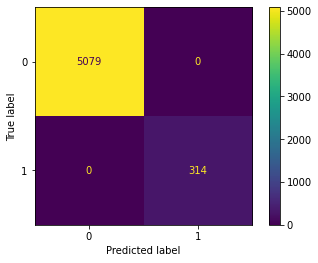

In [451]:


from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeCV


estimators = [
    ('lsvm', svm.SVC(C=0.1, class_weight='balanced', gamma=1, kernel='linear', probability=True)),
    ('svr', BalancedRandomForestClassifier(n_estimators=2, random_state=0))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(class_weight='balanced',random_state = 0)
)



clf.fit(X_train_norm2, y_train2).score(X_test_norm2, y_test2)

cr = classification_report(y_test2, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(clf, X_test_norm2, y_test2, ax=axs[0], colorbar=False).plot()

0.6858520722896704
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      5079
           1       0.12      0.71      0.20       314

    accuracy                           0.67      5393
   macro avg       0.54      0.69      0.49      5393
weighted avg       0.92      0.67      0.76      5393



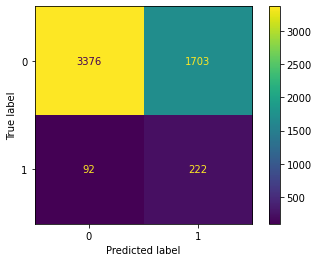

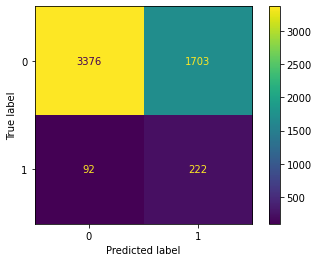

In [474]:

from collections import Counter

from sklearn.metrics import confusion_matrix
from imblearn.ensemble import EasyEnsembleClassifier 

eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train_norm, y_train) 

y_pred = eec.predict(X_test_norm)

print(balanced_accuracy_score(y_test, y_pred) )
cr = classification_report(y_test, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(eec, X_test_norm, y_test, ax=axs[0], colorbar=False).plot()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[0], colorbar=False).plot()


Tal y como sugería la documentación, los mejores resultados los obtenemos con LinearSVC y con un ensemble. El ensemble no mejora la precisión como también sabiamos de antemano, pero si nos mejora el número de falsos positivos. Vamos a utilizar uno de estos dos modelos. Para ello vamos a optimizar los hiperparametros con grid search y ya decidimos, sacamos conclusiones y vendemos la moto.

<AxesSubplot:>

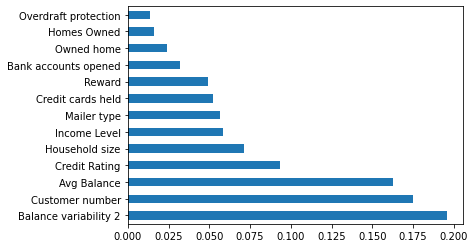

In [443]:
feat_importances = pd.Series(clf2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [391]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
grid = GridSearchCV(clf1,param_grid,refit=True,verbose=2)
grid.fit(X_train_norm,y_train)



print(grid.best_estimator_)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   9.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   9.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   9.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   9.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   9.7s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   9.6s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   9.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   9.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   9.5s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   9.5s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   9.6s
[CV] END ...................C=0.1, gamma=0.01, k

In [427]:
param_grid = {'n_estimators': range(1,100)}
grid = GridSearchCV(clf2,param_grid,refit=True,verbose=2)
grid.fit(X_train_norm,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=3; total time=   0.0s
[CV] END .....................................n

La gráfica de feature importances es muy reveladora, hemos dejado el numero de cliente como si eso fuese una característica. En Andorra el número de pasaporte si es muy antiguo es como que tiene más valor, pero en nuestro caso no sabemos siquiera si se han anonimizado y mezclado los datos y esos ID de cliente significan algo, por lo que si lo eliminamos es bastante probable que el modelo mejore. Como probar es gratis vamos a ello. Utilizaremos el primer clasificador que nos sugiere la guía, LinearSVC.

In [26]:
X2 = data.drop(columns=['Customer number',"Offer accepted"])
y2 = data["Offer accepted"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3, random_state=42)
scaler2 = create_scaler(X_train2, name = 'scaler4.pkl')
X_train_norm2 = scaler2.transform(X_train2)
X_test_norm2 = scaler2.transform(X_test2)


Score:  0.6565207025351665
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      5079
           1       0.12      0.73      0.20       314

    accuracy                           0.66      5393
   macro avg       0.55      0.69      0.49      5393
weighted avg       0.92      0.66      0.75      5393



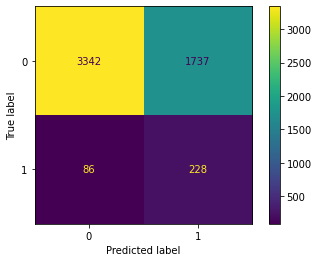

In [27]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


clf = LinearSVC(random_state=0, class_weight='balanced', C=0.01)
clf.fit(X_train_norm2, y_train2)

score = clf.score(X_train_norm2, y_train2)
print("Score: ", score)

y_pred = clf.predict(X_test_norm2)
cr = classification_report(y_test2, y_pred)

ConfusionMatrixDisplay.from_estimator(clf, X_test_norm2, y_test2, ax=axs[0], colorbar=False).plot()
print(cr)

<AxesSubplot:>

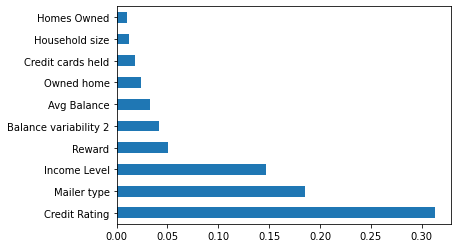

In [470]:
pd.Series(abs(clf.coef_[0]), index=X_train2.columns).nlargest(10).plot(kind='barh')

0.697485775699364
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      5079
           1       0.12      0.71      0.21       314

    accuracy                           0.69      5393
   macro avg       0.55      0.70      0.51      5393
weighted avg       0.92      0.69      0.77      5393



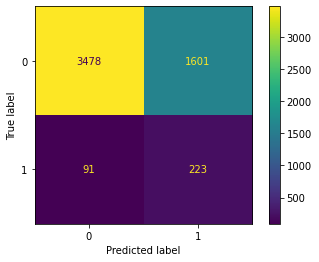

In [28]:
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import svm



clf1 = svm.SVC(C=0.1, class_weight='balanced', gamma=1, kernel='linear', probability=True)
clf2 = BalancedRandomForestClassifier(n_estimators=2, random_state=0)
clf3 = EasyEnsembleClassifier(random_state=42)



eclf = VotingClassifier(
    estimators=[('SVC Linear', clf1),('Balanced RF', clf2),('Easy Ensemble', clf3)],
    voting='hard')


clf1 = clf1.fit(X_train_norm2,y_train2)
clf2 = clf2.fit(X_train_norm2,y_train2)
clf3 = clf3.fit(X_train_norm2, y_train2) 


eclf = eclf.fit(X_train_norm2,y_train2)

y_pred = eclf.predict(X_test_norm2)
print(balanced_accuracy_score(y_test2, y_pred) )
cr = classification_report(y_test2, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(eclf, X_test_norm2, y_test2, ax=axs[0], colorbar=False).plot()


In [29]:
filename = '../models/finalized_model.sav'
pickle.dump(eclf, open(filename, 'wb'))

Si comparamos el clasificador con uno que es lanzar una moneda al aire podemos hacer unos calculos sencillos del valor aportado al que compre esto.

Supongamos que llamar o escribir a una persona cuesta 2 euros (coste del callcenter, salarios etc). Supongamos que obtenemos 50 euros por cada cliente que contrate.

Si llamamos a lo bruto tendremos que llamar a unas 2500 personas para conseguir 150 altas. 5000 euros de gasto y 7500 de beneficio. Ganancia bruta 2500.

Si llamamos utilizando el clasificador llamaremos a 1600 personas (casi mil menos) para conseguir 220 altas. 3200 euros de gasto y 11000 euros de beneficio. Ganancia bruta 7800 euros. 

Podriamos pedir unos 4000 euros por nuestro trabajo asi a ojo de tratante de ganado y aún así nuestro cliente ganaría dinero.



0.5250174629390659
              precision    recall  f1-score   support

           0       0.95      0.50      0.66      5079
           1       0.06      0.55      0.11       314

    accuracy                           0.50      5393
   macro avg       0.51      0.53      0.39      5393
weighted avg       0.90      0.50      0.62      5393



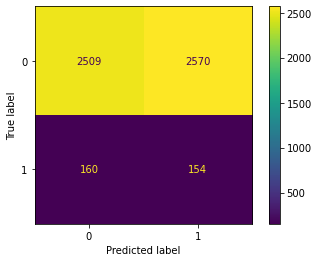

In [477]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_norm2, y_train2)

y_pred = dummy_clf.predict(X_test_norm2)

dummy_clf.score(X_test_norm2, y_test2)


print(balanced_accuracy_score(y_test2, y_pred) )
cr = classification_report(y_test2, y_pred)
print(cr)
ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test_norm2, y_test2, ax=axs[0], colorbar=False).plot()